In [2]:
import numpy as np
from numpy import sqrt, cos, sin
import matplotlib
import matplotlib.pyplot as plt

# Velocities and Accelerations 

## Velocities 

As discussed in the video, a deformation can be a function of time $\mathbf{\varphi}(\mathbf{X},t)$, and in that case, for a given particle that is *initially* at position $\mathbf{X}$, the function  $\mathbf{\varphi}(\mathbf{X},t)$ traces a curve in space as will be shown below. The partial derivative with respect to time gives you tangent vectors to that curve. 

For example, consider the unit cube and assume it moves according to 

$$
\mathbf{x} = \mathbf{\varphi}(\mathbf{X},t) = \mathbf{F}\mathbf{X} + \mathbf{p}
$$

where 

$$
\mathbf{F} = \begin{bmatrix}1+\alpha \sin (\beta t)& 0 &0\\0 & 1+\delta \sin(\gamma t) & 0\\0&0&1\end{bmatrix}
$$

and 

$$
\mathbf{p} = \begin{bmatrix} \eta t\\ \zeta t \\ 0\end{bmatrix}
$$

and for the following example let's consider $\alpha = 0.2, \beta = \pi, \delta = -0.2, \gamma = \pi, \eta=1, \zeta = 1$

The velocity is simply the partial derivative of this deformation map with respect to time 

$$
\mathbf{V}(\mathbf{X},t) = \frac{\partial \mathbf{\varphi}}{\partial t} = \dot{\mathbf{F}}\mathbf{X}+\dot{\mathbf{p}}
$$

with

$$
\dot{\mathbf{F}} =  \frac{\partial \mathbf{F}}{\partial t} =\begin{bmatrix}\alpha \beta \cos (\beta t)& 0 &0\\0 & \delta \gamma \cos(\gamma t) & 0\\0&0&0\end{bmatrix}
$$

and

$$
\dot{\mathbf{p}} = \frac{\partial \mathbf{p}}{\partial t} =\begin{bmatrix} \eta \\ \zeta  \\ 0\end{bmatrix}
$$

* Plot first just the trajectory of a point initially at $\mathbf{X}=[0.5,0.5]$ over time $t\in[0,3.3]$, and that of a point initially at $\mathbf{X}=[0.0,0.5]$
* Plot the partial derivative with respect to time at the corresponding location $\mathbf{x}$. Note how we are evaluating the derivative at  $\mathbf{X}=[0.5,0.5]$ but we are plotting it at $\mathbf{x}$. It is ok, because we know the point $\mathbf{X}$ goes to the point $\mathbf{x}$, but this is an important distinction for the next bullet point 
* For $t=1$, plot the velocity vector field over both the reference geometry $\mathbf{X}$ and over the deformed geometry $\mathbf{x}$. NOTE how it is the SAME vector field, it is just plotted either with respect to the reference or deformed coordinates. A few more notes are discussed after that plot

In [3]:
## Define the function for the deformation 
def evalPhi(X,t):
    alpha = 0.2
    beta = np.pi
    delta = -0.2
    gamma = np.pi 
    eta = 1
    zeta = 1
    F = np.array([[1+alpha*sin(beta*t),0,0],[0,1+delta*sin(gamma*t),0],[0,0,1]])
    P = np.array([eta*t,zeta*t,0])
    return np.dot(F,X)+P

## Take partial derivative with respect to time, this is the velocity!! 
def evalVel(X,t):
    alpha = 0.2
    beta = np.pi
    delta = -0.2
    gamma = np.pi 
    eta = 1
    zeta = 1
    F = np.array([[1+alpha*sin(beta*t),0,0],[0,1+delta*sin(gamma*t),0],[0,0,1]])
    P = np.array([eta*t,zeta*t,0])
    dFdt = np.array([[beta*alpha*cos(beta*t),0,0],[0,gamma*delta*cos(gamma*t),0],[0,0,0]])
    dPdt = np.array([eta,zeta,0])
    return np.dot(dFdt,X)+dPdt

(-0.20690983005625052,
 4.345106431181261,
 -0.2230901699437495,
 4.684893568818739)

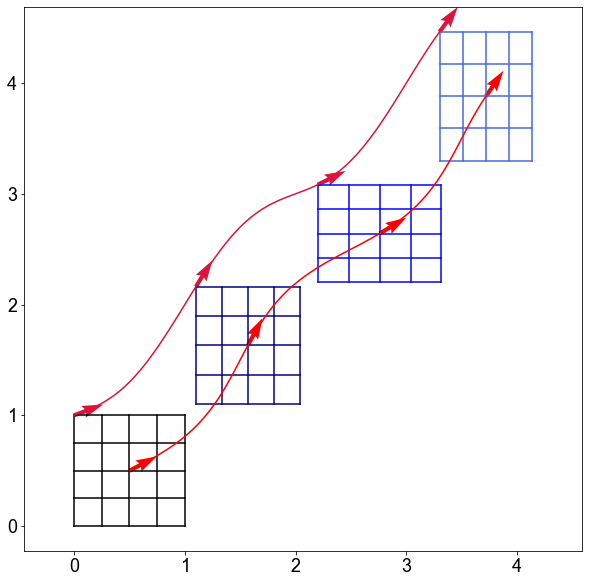

In [4]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,10))
## Function to plot the entire grid for a given time 
def plot_at_t(t,color):
    # Consider a unit cube 
    npx1 = 50
    npx2 = 50
    lineX1 = np.linspace(0,1,npx1)
    lineX2 = np.linspace(0,1,npx2)
    nlx1 = 5
    nlx2 = 5
    for i in range(nlx1):
        X2i = i/(nlx1-1.0)*1.0 
        deformed_line_x1 = np.zeros((npx1))
        deformed_line_x2 = np.zeros((npx1))
        for j in range(npx1):
            X = np.array([lineX1[j],X2i,0])
            x = evalPhi(X,t)
            deformed_line_x1[j] = x[0]
            deformed_line_x2[j] = x[1]
        plt.plot(deformed_line_x1,deformed_line_x2,color=color)
    for i in range(nlx2):        
        X1i = i/(nlx2-1.0)*1.0 
        deformed_line_x1 = np.zeros((npx1))
        deformed_line_x2 = np.zeros((npx1))
        for j in range(npx1):
            X = np.array([X1i,lineX2[j],0])
            x = evalPhi(X,t)
            deformed_line_x1[j] = x[0]
            deformed_line_x2[j] = x[1]
        plt.plot(deformed_line_x1,deformed_line_x2,color=color)

## FUNCTION to plot tracjectory for a point 
def plot_trajectory_X_at_tvec(X,tvec,color):
    x_vec = np.zeros((len(tvec),2))
    for i in range(len(tvec)):
        x = evalPhi(X,tvec[i])
        x_vec[i,0] = x[0]
        x_vec[i,1] = x[1]
    plt.plot(x_vec[:,0],x_vec[:,1],color=color)

## FUNCTION to plot the velocity vector at the corresponding deformed position
def plot_V_at_x_t(X,t,color):
    x = evalPhi(X,t)
    V = evalVel(X,t)
    plt.quiver(x[0],x[1],V[0],V[1],color=color)
        
## PLOT for t=0, t=0.5, t=1
plot_at_t(0.0,'black')
plot_at_t(1.1,'navy')
plot_at_t(2.2,'blue')
plot_at_t(3.3,'royalblue')

## PLOT trajectory 
X0 = np.array([0.5,0.5,0])
X1 = np.array([0.0,1.0,0])
tvec = np.linspace(0,3.3,100)
plot_trajectory_X_at_tvec(X0,tvec,'red')
plot_trajectory_X_at_tvec(X1,tvec,'crimson')

## PLOT velocity vector for X0 at given times, but plot it over deformed point 'x'
plot_V_at_x_t(X0,0.0,'red')
plot_V_at_x_t(X0,1.1,'red')
plot_V_at_x_t(X0,2.2,'red')
plot_V_at_x_t(X0,3.3,'red')

## PLOT velocity vector for X1 at given times, but even though it is evaluated on X1, plot
# at the deformed position x1
plot_V_at_x_t(X1,0.0,'crimson')
plot_V_at_x_t(X1,1.1,'crimson')
plot_V_at_x_t(X1,2.2,'crimson')
plot_V_at_x_t(X1,3.3,'crimson')

plt.axis('equal')

### Remarks

Note how in the plot above we:
* Constructed a reference grid over the unit square, that is, we chose a few points X in the reference configuration
* Looped over the reference grid and computed the deformation map for different times t. For every point in the reference grid and for a given time, we got the corresponding deformed position
* To draw the trajectories, we picked particular points and traced their motion with respect to t.
* We took the derivative of the deformation map with respect to time and that gave us the velocity vector for a particle $\mathbf{X}$ and a time t, that is, we computed $\mathbf{V}(\mathbf{X},t)$
* NOTE how, even though we evaluated the velocity for a particle $\mathbf{X}$, we actually plotted the velocity vector at the corresponding deformed coordinate $\mathbf{x}$, in other words, even though we did not find an expression for it, we are actually plotting $\mathbf{v}(\mathbf{x},t)$ 
* Below, plot the field $\mathbf{V}(\mathbf{X},t)$ for $t=1.2$ at the reference coordinates $\mathbf{X}$, and also plot the same vector field, but over the deformed coordinates $\mathbf{x}$

(-0.10412214747707527,
 2.1865650970185806,
 -0.11587785252292473,
 2.4334349029814195)

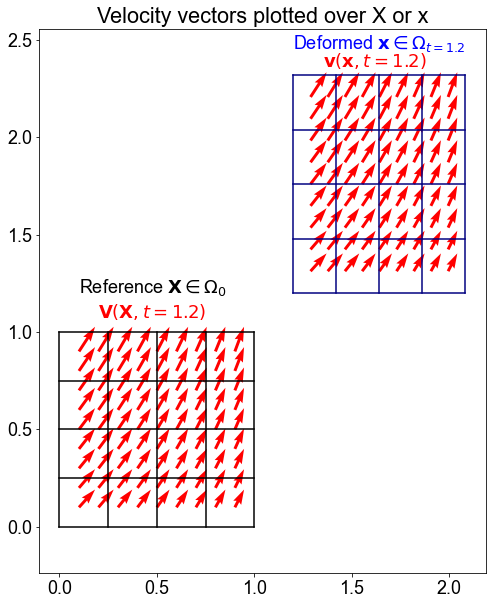

In [5]:
## just plotting the entire grid at two time points 
fig = plt.figure(figsize=(8,10))
plot_at_t(0.0,'black')
plot_at_t(1.2,'navy')


# to create the quiver V(X,t) and v(x,t), loop over points in the reference, compute V, computer varphi
dx = 0.1
dy = 0.1
nx = int(1.0/dx)-1
ny = int(1.0/dy)-1
quivers_X = np.zeros((nx*ny,2))
quivers_V = np.zeros((nx*ny,2))
quivers_x = np.zeros((nx*ny,2))
for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        X1 = (i+1)*dx
        X2 = (j+1)*dy
        # eval deformation to get deformed points 'x' at time t=1.1
        t = 1.2
        x = evalPhi(np.array([X1,X2,0]),t)
        # store to plot later 
        quivers_X[i*nx+j,0] = X1
        quivers_X[i*nx+j,1] = X2
        quivers_x[i*nx+j,0] = x[0]
        quivers_x[i*nx+j,1] = x[1]
        # evaluate velocity 
        V = evalVel(np.array([X1,X2,0]),t)
        # note, we only have a way to evaluate V(X) and not v(x) 
        # store 
        quivers_V[i*nx+j,0] = V[0]
        quivers_V[i*nx+j,1] = V[1]
## PLOT 
# plot the field V over the points X 
plt.quiver(quivers_X[:,0],quivers_X[:,1],quivers_V[:,0],quivers_V[:,1],color='red')
# plot the SAME vectors, but over the points x
plt.quiver(quivers_x[:,0],quivers_x[:,1],quivers_V[:,0],quivers_V[:,1],color='red')
plt.title('Velocity vectors plotted over X or x')
plt.text(0.1,1.2,r'Reference $\mathbf{X}\in\Omega_0$',color='black')
plt.text(0.2,1.07,r'$\mathbf{V}(\mathbf{X},t=1.2)$',color='red')
plt.text(1.2,2.45,r'Deformed $\mathbf{x}\in\Omega_{t=1.2}$',color='blue')
plt.text(1.35,2.36,r'$\mathbf{v}(\mathbf{x},t=1.2)$',color='red')
plt.axis('equal')

### Remarks 

Now how we plotted the **SAME** vectors but either over $\mathbf{X}$ or over $\mathbf{x}$. For now, ignore how we were able to compute them, just look at the picture, the vector field over $\mathbf{X}$ is $\mathbf{V}$, the vector field over $\mathbf{x}$ is $\mathbf{v}$. **The fields are differend** even if the vectors are the same. Why? Because the geometry is different! You can see how plotting the same vectors in two geometries requires you to re-arrange the vectors, move them around, just because the geometry has changed. 

If you think about how we plotted the two fields, we only actually evaluated directly $\mathbf{V}(\mathbf{X},t=1.2)$, but then we plotted it directly on $\mathbf{X}$ or we plotted over $\mathbf{x}$. The latter, plotting over $\mathbf{x}$ means we composed the velocity field with the deformation field, we effectively did $\mathbf{V}(\mathbf{\varphi}^{-1}(\mathbf{x}),t=1.2)$.

To see this is the case, we can actually compute the inverse deformation map 

$$
\mathbf{X} = \mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})
$$ 

And plug into the velocity to get 

$$
\mathbf{v}(\mathbf{x},t) = \dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p}) + \dot{\mathbf{p}}
$$

Plot below a quiver plot over the *subset* of the deformed configuration $\mathbf{x}\in [1.5,2]\times[1.5,2]$. Note that to plot the full $\mathbf{v}$ we would need to know the exact deformed geometry $\Omega_{t=1.2}$ but we actually don't have an analytical expression. All we can do is plot over a *control volume*. This is like looking at a fixed window and then as the body passes through it we can temporarilly trace a few particles and compute a velocity field from that. In other words this is like doing [particle image velocimetry](https://en.wikipedia.org/wiki/Particle_image_velocimetry)



(1.1558778525229247,
 2.1265650970185805,
 1.1441221474770753,
 2.3734349029814195)

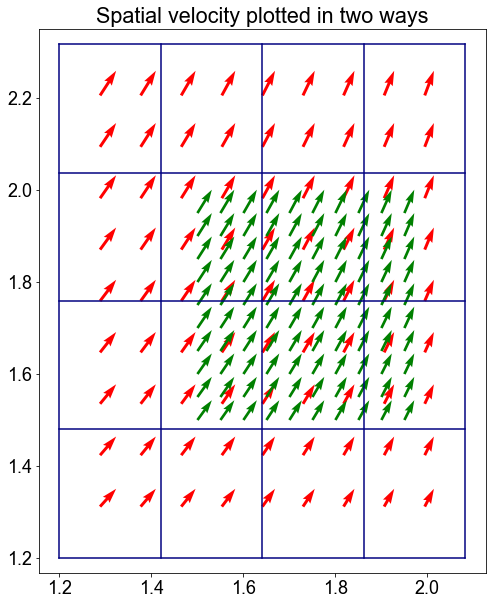

In [6]:
## FUNCTION for spatial velocity 
def evalv(x,t):
    alpha = 0.2
    beta = np.pi
    delta = -0.2
    gamma = np.pi 
    eta = 1
    zeta = 1
    F = np.array([[1+alpha*sin(beta*t),0,0],[0,1+delta*sin(gamma*t),0],[0,0,1]])
    Finv = np.linalg.inv(F)
    P = np.array([eta*t,zeta*t,0])
    dFdt = np.array([[beta*alpha*cos(beta*t),0,0],[0,gamma*delta*cos(gamma*t),0],[0,0,0]])
    dPdt = np.array([eta,zeta,0])
    return np.dot(dFdt,np.dot(Finv,x-P))+dPdt

## plotting the entire grid at t=1.2
fig = plt.figure(figsize=(8,10))
plot_at_t(1.2,'navy')

# to create the quiver v(v,t) loop over the fixed window x in [1.5,2] x [1.5,2]
dx = 0.05
dy = 0.05
nx = 10
ny = 10
quivers_x_directly = np.zeros((nx*ny,2))
quivers_v = np.zeros((nx*ny,2))
for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        x1 = 1.5+i*dx
        x2 = 1.5+j*dy
        # store to plot later 
        quivers_x_directly[i*nx+j,0] = x1
        quivers_x_directly[i*nx+j,1] = x2
        # evaluate velocity 
        t=1.2
        v = evalv(np.array([x1,x2,0]),t)
        # store 
        quivers_v[i*nx+j,0] = v[0]
        quivers_v[i*nx+j,1] = v[1]
## PLOT 
# plot the way we did it before, using V(X,t) then plotted over x
plt.quiver(quivers_x[:,0],quivers_x[:,1],quivers_V[:,0],quivers_V[:,1],color='red')
# plot by evaluating directly over x
plt.quiver(quivers_x_directly[:,0],quivers_x_directly[:,1],quivers_v[:,0],quivers_v[:,1],color='green')
plt.title('Spatial velocity plotted in two ways')
# plt.text(0.1,1.2,r'Reference $\mathbf{X}\in\Omega_0$',color='black')
# plt.text(0.2,1.07,r'$\mathbf{V}(\mathbf{X},t=1.2)$',color='red')
# plt.text(1.2,2.45,r'Deformed $\mathbf{x}\in\Omega_{t=1.2}$',color='blue')
# plt.text(1.35,2.36,r'$\mathbf{v}(\mathbf{x},t=1.2)$',color='red')
plt.axis('equal')

In the above plot you can see how we have plotted again the spatial velocity field calculated in the same way as we did before, by computing first $\mathbf{V}(\mathbf{X},t)$ and then plotting the vectors over $\mathbf{x}$. Now we have also obtained an expression for $\mathbf{v}(\mathbf{x},t)$ directly as a function of $\mathbf{x}$. Again the vectors are the same. 

## Acceleration 

We will consider still the same motion as before and now the goal is to compute the acceleration vector field. The easiest to compute is to follow a particle $\mathbf{X}$ and trace the trajectory it makes, just as we did for the velocities, but if we take one more derivative we get the acceleration

$$
\mathbf{A}(\mathbf{X},t)=\frac{\partial \varphi(\mathbf{X},t)}{\partial t}
$$

For the particular example consider we have 

$$
\mathbf{A} = \ddot{\mathbf{F}}\mathbf{X}
$$


$$
\ddot{\mathbf{F}} =  \frac{\partial^2 \mathbf{F}}{\partial t^2} =\begin{bmatrix}-\alpha \beta^2 \sin (\beta t)& 0 &0\\0 & -\delta \gamma^2 \cos(\gamma t) & 0\\0&0&0\end{bmatrix}
$$


This field $\mathbf{A}(\mathbf{X},t)$ can be easily plotted over the reference configuration. Additionally, just like we did for the velocities, we can plot the field over the deformed geometry. The vector field over the deformed geometry is $\mathbf{a}(\mathbf{x},t)$. We can plot this field even if we don't have an analytycal expression for it! 


First, simply plot compute the acceleration field $\mathbf{A}(\mathbf{X},t)$ and plot it for a couple of particles along their trajectories. 

In [7]:
## SAME motion as before, taking two derivatives to get acceleration as a function 
# of original coordinates 
## Take partial derivative with respect to time, this is the velocity!! 
def evalAcc(X,t):
    alpha = 0.2
    beta = np.pi
    delta = -0.2
    gamma = np.pi 
    eta = 1
    zeta = 1
    F = np.array([[1+alpha*sin(beta*t),0,0],[0,1+delta*sin(gamma*t),0],[0,0,1]])
    P = np.array([eta*t,zeta*t,0])
    dFdt = np.array([[beta*alpha*cos(beta*t),0,0],[0,gamma*delta*cos(gamma*t),0],[0,0,0]])
    dPdt = np.array([eta,zeta,0])
    d2Fdt2 = np.array([[-beta**2*alpha*sin(beta*t),0,0],[0,-gamma**2*delta*sin(gamma*t),0],[0,0,0]])
    d2Pdt2 = np.array([0,0,0])
    return np.dot(d2Fdt2,X)+d2Pdt2

(-0.20690983005625052,
 4.345106431181261,
 -0.2230901699437495,
 4.684893568818739)

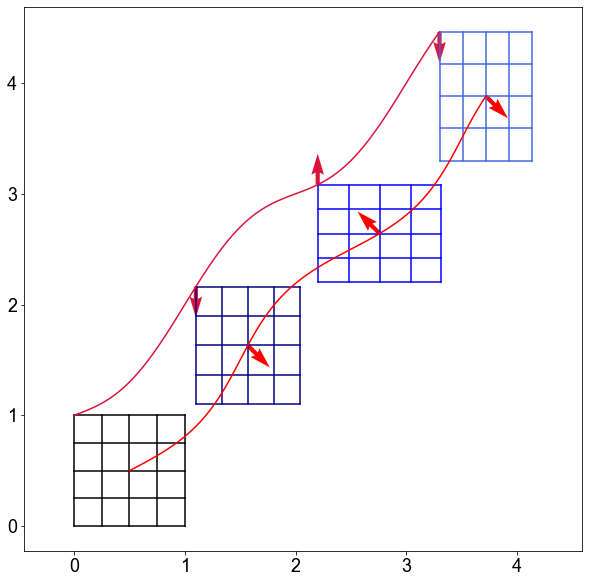

In [8]:
font = {'family' : 'Arial',
        'size'   : 18}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,10))
## Function to plot the entire grid for a given time 
def plot_at_t(t,color):
    # Consider a unit cube 
    npx1 = 50
    npx2 = 50
    lineX1 = np.linspace(0,1,npx1)
    lineX2 = np.linspace(0,1,npx2)
    nlx1 = 5
    nlx2 = 5
    for i in range(nlx1):
        X2i = i/(nlx1-1.0)*1.0 
        deformed_line_x1 = np.zeros((npx1))
        deformed_line_x2 = np.zeros((npx1))
        for j in range(npx1):
            X = np.array([lineX1[j],X2i,0])
            x = evalPhi(X,t)
            deformed_line_x1[j] = x[0]
            deformed_line_x2[j] = x[1]
        plt.plot(deformed_line_x1,deformed_line_x2,color=color)
    for i in range(nlx2):        
        X1i = i/(nlx2-1.0)*1.0 
        deformed_line_x1 = np.zeros((npx1))
        deformed_line_x2 = np.zeros((npx1))
        for j in range(npx1):
            X = np.array([X1i,lineX2[j],0])
            x = evalPhi(X,t)
            deformed_line_x1[j] = x[0]
            deformed_line_x2[j] = x[1]
        plt.plot(deformed_line_x1,deformed_line_x2,color=color)

## FUNCTION to plot tracjectory for a point 
def plot_trajectory_X_at_tvec(X,tvec,color):
    x_vec = np.zeros((len(tvec),2))
    for i in range(len(tvec)):
        x = evalPhi(X,tvec[i])
        x_vec[i,0] = x[0]
        x_vec[i,1] = x[1]
    plt.plot(x_vec[:,0],x_vec[:,1],color=color)

## FUNCTION to plot the velocity vector at the corresponding deformed position
def plot_V_at_x_t(X,t,color):
    x = evalPhi(X,t)
    V = evalVel(X,t)
    plt.quiver(x[0],x[1],V[0],V[1],color=color)

## FUNCTION to plot the acceleration vector at the corresponding deformed position
def plot_A_at_x_t(X,t,color):
    x = evalPhi(X,t)
    A = evalAcc(X,t)
    plt.quiver(x[0],x[1],A[0],A[1],color=color)

## PLOT for t=0, t=0.5, t=1
plot_at_t(0.0,'black')
plot_at_t(1.1,'navy')
plot_at_t(2.2,'blue')
plot_at_t(3.3,'royalblue')

## PLOT trajectory 
X0 = np.array([0.5,0.5,0])
X1 = np.array([0.0,1.0,0])
tvec = np.linspace(0,3.3,100)
plot_trajectory_X_at_tvec(X0,tvec,'red')
plot_trajectory_X_at_tvec(X1,tvec,'crimson')

## PLOT acceleration vector for X0 at given times, but plot it over deformed point 'x'
#plot_A_at_x_t(X0,0.0,'red')
plot_A_at_x_t(X0,1.1,'red')
plot_A_at_x_t(X0,2.2,'red')
plot_A_at_x_t(X0,3.3,'red')

## PLOT acceleration
#plot_A_at_x_t(X1,0.0,'crimson')
plot_A_at_x_t(X1,1.1,'crimson')
plot_A_at_x_t(X1,2.2,'crimson')
plot_A_at_x_t(X1,3.3,'crimson')


plt.axis('equal')

Now, we plot the entire field over the reference geometry but also over the deformed geometry. Note that we can plot $\mathbf{a}(\mathbf{x},t)$ even without an analytical expression, all we need to do is evaluate both $\mathbf{A}(\mathbf{X},t)$ and $\mathbf{\varphi}(\mathbf{X},t)$ and plot the vectors at their deformed location. 

(-0.10412214747707527,
 2.1865650970185806,
 -0.11587785252292473,
 2.4334349029814195)

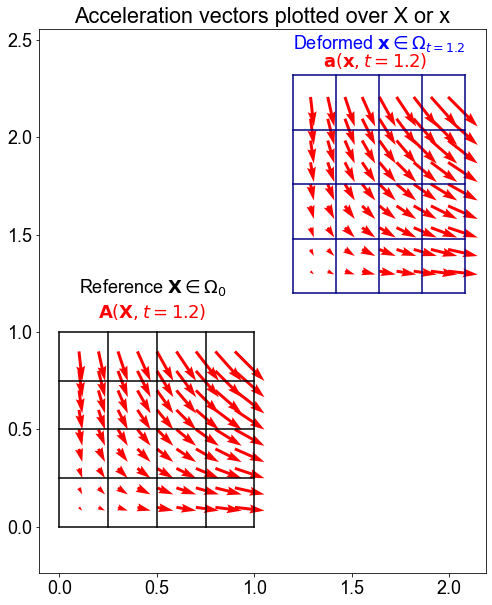

In [9]:
## just plotting the entire grid at two time points 
fig = plt.figure(figsize=(8,10))
plot_at_t(0.0,'black')
plot_at_t(1.2,'navy')


# to create the quiver V(X,t) and v(x,t), loop over points in the reference, compute V, computer varphi
dx = 0.1
dy = 0.1
nx = int(1.0/dx)-1
ny = int(1.0/dy)-1
quivers_X = np.zeros((nx*ny,2))
quivers_A = np.zeros((nx*ny,2))
quivers_x = np.zeros((nx*ny,2))
for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        X1 = (i+1)*dx
        X2 = (j+1)*dy
        # eval deformation to get deformed points 'x' at time t=1.1
        t = 1.2
        x = evalPhi(np.array([X1,X2,0]),t)
        # store to plot later 
        quivers_X[i*nx+j,0] = X1
        quivers_X[i*nx+j,1] = X2
        quivers_x[i*nx+j,0] = x[0]
        quivers_x[i*nx+j,1] = x[1]
        # evaluate acceleration
        A = evalAcc(np.array([X1,X2,0]),t)
        # note, we only have a way to evaluate V(X) and not v(x) 
        # store 
        quivers_A[i*nx+j,0] = A[0]
        quivers_A[i*nx+j,1] = A[1]
## PLOT 
# plot the field V over the points X 
plt.quiver(quivers_X[:,0],quivers_X[:,1],quivers_A[:,0],quivers_A[:,1],color='red')
# plot the SAME vectors, but over the points x
plt.quiver(quivers_x[:,0],quivers_x[:,1],quivers_A[:,0],quivers_A[:,1],color='red')
plt.title('Acceleration vectors plotted over X or x')
plt.text(0.1,1.2,r'Reference $\mathbf{X}\in\Omega_0$',color='black')
plt.text(0.2,1.07,r'$\mathbf{A}(\mathbf{X},t=1.2)$',color='red')
plt.text(1.2,2.45,r'Deformed $\mathbf{x}\in\Omega_{t=1.2}$',color='blue')
plt.text(1.35,2.36,r'$\mathbf{a}(\mathbf{x},t=1.2)$',color='red')
plt.axis('equal')

### Remark 

Just as in the case for the velocities, note that the vectors are the same! we just plotted them over either $\mathbf{X}$ or $\mathbf{x}$ but the vectors are the same, we kind of 'copy-paste' them in different locations. As a result, the fields are different, they do look a little different, even though they are made out of the same vectors.  

### Different derivations of the spatial acceleration 

The way the acceleration field was plotted above was by plotting the vectors from $\mathbf{A}(\mathbf{X},t)$ over $\mathbf{x}$, but without having an analytical expression for $\mathbf{a}$. However, we can actually get an analytical expression for $\mathbf{a}(\mathbf{x},t)$. There are two ways.

To get an analytical expression for the spatial acceleration we would need to do either: 

$$
\mathbf{a}(\mathbf{x},t) = \mathbf{A}(\mathbf{\varphi}^{-1}(\mathbf{x}),t)
$$

Or, with the material time derivative 

$$
\mathbf{a}(\mathbf{x},t) = \frac{\partial \mathbf{v}(\mathbf{X},t)}{\partial t} + (\nabla_x \mathbf v)\mathbf v
$$


#### Spatial acceleration by substituting the inverse deformation map 

The inverse deformation map has been found above:

$$
\mathbf{X} = \mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})
$$ 

plugging this into the material acceleration we get 

$$
\mathbf{a}(\mathbf{x},t) = \ddot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})
$$

#### Spatial acceleration using the material time derivative 

This is a special type of derivative. What is special about it is that it is a *spatial* derivative, pardon the pun. What I mean is that we can compute the spatial acceleration field, i.e. the acceleration in terms of the deformed coordinates $\mathbf{x}$ without having the deformation map $\mathbf{\varphi}(\mathbf{X},t)$, what?! Yes, but we do need the spatial velocity field $\mathbf{v}(\mathbf{x},t)$. What is this magic? Well, it is nothing more than chain rule: the acceleration is both the result of the acceleration of particles with respect to the body, this is captured by $\partial \mathbf{v}/\partial t$ plus the fact that the body itself is actually moving and therefore *advecting* the vector field, this is captured by the second term $(\nabla \mathbf v)\mathbf v$. 

For our particular example we have 

$$
\begin{aligned}
\mathbf{a}(\mathbf{x},t) &= \frac{\partial \mathbf{v}(\mathbf{X},t)}{\partial t} + (\nabla_x \mathbf v)\mathbf v
\\&= \frac{\partial\dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})+\dot{\mathbf{p}}}{\partial t} + \frac{\partial\dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})+\dot{\mathbf{p}} }{\partial \mathbf{x}} (\dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})+\dot{\mathbf{p}} )\\
&=\ddot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})+{\dot{\mathbf{F}}}\dot{\mathbf{F}}^{-1}(\mathbf{x}-\mathbf{p})
-\dot{\mathbf{F}}\mathbf{F}^{-1}\dot{\mathbf{p}} + \dot{\mathbf{F}}\mathbf{F}^{-1}(\dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p}) + \dot{\mathbf{p}})\\
&= \ddot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})+{\dot{\mathbf{F}}}\dot{\mathbf{F}}^{-1}(\mathbf{x}-\mathbf{p})
 + \dot{\mathbf{F}}\mathbf{F}^{-1}(\dot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p}) )
\end{aligned}
$$

Also, from the identity

$$
\mathbf{F}\mathbf{F}^{-1} = \mathbf{I}
$$

taking derivatives on both sides we get 

$$
\dot{\mathbf{F}}\mathbf{F}^{-1} + \mathbf{F}\dot{\mathbf{F}}^{-1} = \mathbf{0}
$$

from which 

$$
\dot{\mathbf{F}}\mathbf{F}^{-1} = - \mathbf{F}\dot{\mathbf{F}}^{-1}
$$

and

$$
\mathbf{F}^{-1} \dot{\mathbf{F}}\mathbf{F}^{-1} = -\dot{\mathbf{F}}^{-1}
$$

plugging this result into the expression above for $\mathbf{a}(\mathbf{x},t)$ we finally can cancel out the second and third terms to get 


$$
\mathbf{a}(\mathbf{x},t) = \ddot{\mathbf{F}}\mathbf{F}^{-1}(\mathbf{x}-\mathbf{p})
$$

which is the same thing we had before. 

For further reading on this type of quantity which can be computed based on spatial fields, you need to consult further continuum mechanics sources like: 

* Lai WM, Rubin DH, Rubin D, Krempl E. Introduction to continuum mechanics. Butterworth-Heinemann; 2009 Jul 23.
* Holzapfel GA. Nonlinear solid mechanics: a continuum approach for engineering science. Wiley. 2000. 

Below, we will plot the spatial acceleration in the same way as before and also based on this analytical expression we just derived, to see that they are the same


(1.1558778525229247,
 2.1265650970185805,
 1.1441221474770753,
 2.3734349029814195)

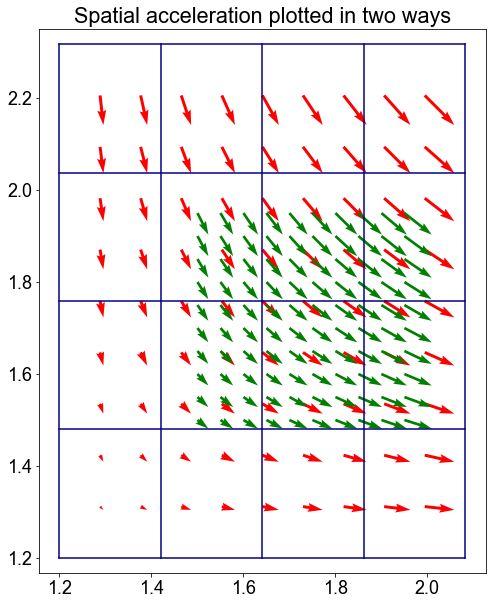

In [10]:
## FUNCTION for spatial acceleration
def evala(x,t):
    alpha = 0.2
    beta = np.pi
    delta = -0.2
    gamma = np.pi 
    eta = 1
    zeta = 1
    F = np.array([[1+alpha*sin(beta*t),0,0],[0,1+delta*sin(gamma*t),0],[0,0,1]])
    Finv = np.linalg.inv(F)
    P = np.array([eta*t,zeta*t,0])
    dFdt = np.array([[beta*alpha*cos(beta*t),0,0],[0,gamma*delta*cos(gamma*t),0],[0,0,0]])
    dPdt = np.array([eta,zeta,0])
    d2Fdt2 = np.array([[-beta**2*alpha*sin(beta*t),0,0],[0,-gamma**2*delta*sin(gamma*t),0],[0,0,0]])
    d2Pdt2 = np.array([0,0,0])
    return np.dot(d2Fdt2,np.dot(Finv,x-P))

## plotting the entire grid at t=1.2
fig = plt.figure(figsize=(8,10))
plot_at_t(1.2,'navy')

# to create the quiver v(v,t) loop over the fixed window x in [1.5,2] x [1.5,2]
dx = 0.05
dy = 0.05
nx = 10
ny = 10
quivers_x_directly = np.zeros((nx*ny,2))
quivers_a = np.zeros((nx*ny,2))
for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        x1 = 1.5+i*dx
        x2 = 1.5+j*dy
        # store to plot later 
        quivers_x_directly[i*nx+j,0] = x1
        quivers_x_directly[i*nx+j,1] = x2
        # evaluate velocity 
        t=1.2
        a = evala(np.array([x1,x2,0]),t)
        # store 
        quivers_a[i*nx+j,0] = a[0]
        quivers_a[i*nx+j,1] = a[1]
## PLOT 
# plot the way we did it before, using V(X,t) then plotted over x
plt.quiver(quivers_x[:,0],quivers_x[:,1],quivers_A[:,0],quivers_A[:,1],color='red')
# plot by evaluating directly over x
plt.quiver(quivers_x_directly[:,0],quivers_x_directly[:,1],quivers_a[:,0],quivers_a[:,1],color='green')
plt.title('Spatial acceleration plotted in two ways')
# plt.text(0.1,1.2,r'Reference $\mathbf{X}\in\Omega_0$',color='black')
# plt.text(0.2,1.07,r'$\mathbf{V}(\mathbf{X},t=1.2)$',color='red')
# plt.text(1.2,2.45,r'Deformed $\mathbf{x}\in\Omega_{t=1.2}$',color='blue')
# plt.text(1.35,2.36,r'$\mathbf{v}(\mathbf{x},t=1.2)$',color='red')
plt.axis('equal')

### Remark 

As you can see, just as was the case for the velocities, it is the same to compute $\mathbf{A}(\mathbf{X},t)$ and then plot over the deformed coordinates $\mathbf{x}$ than getting an analytical expression for $\mathbf{a}(\mathbf{x},t)$. 

### Activity 

Consider a new motion given by $\mathbf{\varphi}(\mathbf{X}) = \mathbf{Q}\mathbf{X} + \mathbf{P}$ where $\mathbf{Q}$ is a rotation around the $z$ axis, and the vector $\mathbf{P}=[t,t,0]^T$. Apply this deformation to unit cube, i.e. of dimensions $1\times 1\times 1$. We will use the same rotation as in the Jupyter notebook on deformation gradient, 

$$
\mathbf{Q} = \cos(\theta)\mathbf{I} + \sin(\theta)\star \mathbf{u} +  (1-\cos(\theta))\mathbf{u}\otimes \mathbf{u}
$$

Where $\mathbf{u}$ is the axis of rotation, and $\theta$ is the angle of rotation. The $\star \mathbf{u}$ is the *Hodge star* operator defined in the previous python notebook. Consider an angle of rotation $\theta=\pi t/3$ radians, where $t$ is time.

- Plot the trajectory for a couple of particles during the time $t\in[0,3]$
- Plot the velocity vectors along the trajectory and verify that the velocity vectors are tangent to the trajectory. No need to determine the spatial velocity vector field, just $\mathbf{V}(\mathbf{X},t)$ will do.  
- Plot the acceleration vector along the trajectory. No need to compute the spatial acceleration, just $\mathbf{A}(\mathbf{X},t)$ will do.
- Plot the velocity vector field for time $t=1$ and plot this field over both the initial domain $\mathbf{X}$ and the actual deformed domain $\mathbf{x}$ at time $t=2$. Again, do everything with the material field $\mathbf{V}(\mathbf{X},t)$, there is no need to compute the spatial velocity analytically. 
- Plot the acceleration vector field for time $t=2$ and plot this field over both the initial domain $\mathbf{X}$ and the actual deformed domain $\mathbf{x}$ at time $t=1$. Again, just use $\mathbf{A}(\mathbf{X},t)$ and plot over either $\mathbf{X}$ or $\mathbf{x}$, no need to actually derive an expression for $\mathbf{a}(\mathbf{x},t)$. 


In [11]:
## for the first motion in the activity above, let's just define the function first and then follow the code
# as in the example 
def Phi_example_1(X,t):
    # defining the rotation tensor with the definition above 
    theta = np.pi/3*t
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    P = np.array([t,t,0])
    x = np.zeros(X.shape)
    for i in range(x.shape[1]):
        x[:,i] = np.dot(Q,X[:,i])+P
    return x

# for the velocity, note that the only thing that nepends on time is the angle theta so 
def V_example_1(X,t):
    # defining the rotation tensor with the definition above 
    theta = np.pi/3*t
    dthetadt = np.pi/3
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    dQdt = -np.sin(theta)*dthetadt*np.eye(3)+np.cos(theta)*dthetadt*hodge_star(e3)+(1+np.sin(theta)*dthetadt)*np.outer(e3,e3)
    P = np.array([t,t,0])
    dPdt = np.array([1,1,0])
    V = np.zeros(X.shape)
    for i in range(V.shape[1]):
        V[:,i] = np.dot(dQdt,X[:,i])+dPdt
    return V

# for the acceleration 
def A_example_1(X,t):
    # defining the rotation tensor with the definition above 
    theta = np.pi/3*t
    dthetadt = np.pi/3
    e3 = np.array([0,0,1])
    Q = np.cos(theta)*np.eye(3)+np.sin(theta)*hodge_star(e3)+(1-np.cos(theta))*np.outer(e3,e3)
    dQdt = -np.sin(theta)*dthetadt*np.eye(3)+np.cos(theta)*dthetadt*hodge_star(e3)+(1+np.sin(theta)*dthetadt)*np.outer(e3,e3)
    d2Qdt2 = -np.cos(theta)*dthetadt**2*np.eye(3)-np.sin(theta)*dthetadt**2*hodge_star(e3)+(1+np.cos(theta)*dthetadt**2)*np.outer(e3,e3)
    P = np.array([t,t,0])
    dPdt = np.array([1,1,0])
    A = np.zeros(X.shape)
    for i in range(A.shape[1]):
        A[:,i] = np.dot(d2Qdt2,X[:,i])
    return A

# note the rotation tensor above requires the Levi Cevita symbol which is defined in this function
def levi_civita_epsilon(i,j,k):
    if i==0 and j==1 and k==2:
        return 1
    elif i==1 and j==2 and k==0:
        return 1
    elif i==2 and j==0 and k==1:
        return 1
    elif i==2 and j==1 and k==0:
        return -1
    elif i==1 and j==0 and k==2:
        return -1
    elif i==0 and j==2 and k==1:
        return -1
    else:
        return 0

# the hodge star operator returns a second order tensor out of a vector 
def hodge_star(u):
    A = np.zeros((3,3))
    for i in range(3):
        for j in range(3):
            for k in range(3):
                A[i,j] += levi_civita_epsilon(i,k,j)*u[k]
    return A

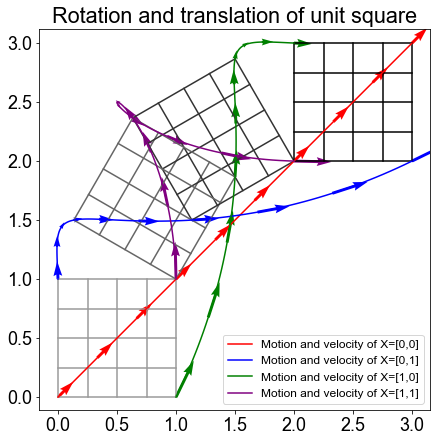

In [12]:
fig = plt.figure(figsize=(7,7))
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color=[0.6,0.6,0.6])
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=1
    xvec_1 = Phi_example_1(Xvec,1)
    plt.plot(xvec_1[0],xvec_1[1],color=[0.4,0.4,0.4])
    # deformed grid lines obtained from applying deformation map at t=2
    xvec_2 = Phi_example_1(Xvec,2)
    plt.plot(xvec_2[0],xvec_2[1],color=[0.2,0.2,0.2])
    # deformed grid lines obtained from applying deformation map at t=3
    xvec_3 = Phi_example_1(Xvec,3)
    plt.plot(xvec_3[0],xvec_3[1],color=[0.0,0.0,0.0])
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color=[0.6,0.6,0.6])
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=1
    xvec_1 = Phi_example_1(Xvec,1)
    plt.plot(xvec_1[0],xvec_1[1],color=[0.4,0.4,0.4])
    # deformed grid lines obtained from applying deformation map at t=2
    xvec_2 = Phi_example_1(Xvec,2)
    plt.plot(xvec_2[0],xvec_2[1],color=[0.2,0.2,0.2])
    # deformed grid lines obtained from applying deformation map at t=3
    xvec_3 = Phi_example_1(Xvec,3)
    plt.plot(xvec_3[0],xvec_3[1],color=[0.0,0.0,0.0])
    
# now lets just plot the trajectory of a couple of points for multiple times 
# this is one of the particles 
X0 = np.array([[0,0.,0]])
# this is another particle
X1 = np.array([[0.0,1.0,0]])
# this yet another particle 
X2 = np.array([[1.0,0.0,0]])
# last one 
X3 = np.array([[1.0,1.0,0]])
#
tvec = np.linspace(0,3,100)
x0 = np.zeros((100,3))
x1 = np.zeros((100,3))
x2 = np.zeros((100,3))
x3 = np.zeros((100,3))
for i in range(100):
    x0[i,:] = Phi_example_1(X0.transpose(),tvec[i])[:,0]
    x1[i,:] = Phi_example_1(X1.transpose(),tvec[i])[:,0]
    x2[i,:] = Phi_example_1(X2.transpose(),tvec[i])[:,0]
    x3[i,:] = Phi_example_1(X3.transpose(),tvec[i])[:,0]
plt.plot(x0[:,0],x0[:,1],color='red',label='Motion and velocity of X=[0,0]')
plt.plot(x1[:,0],x1[:,1],color='blue',label='Motion and velocity of X=[0,1]')
plt.plot(x2[:,0],x2[:,1],color='green',label='Motion and velocity of X=[1,0]')
plt.plot(x3[:,0],x3[:,1],color='purple',label='Motion and velocity of X=[1,1]')

# and let's plot the velocity for a few points along the trajectories of these particles 
t_quiver = np.linspace(0,3,10)
x0_quiver = np.zeros((10,3))
V0 = np.zeros((10,3))
x1_quiver = np.zeros((10,3))
V1 = np.zeros((10,3))
x2_quiver = np.zeros((10,3))
V2 = np.zeros((10,3))
x3_quiver = np.zeros((10,3))
V3 = np.zeros((10,3))
for i in range(10):
    x0_quiver[i,:] = Phi_example_1(X0.transpose(),t_quiver[i])[:,0]
    V0[i,:] = V_example_1(X0.transpose(),t_quiver[i])[:,0]
    x1_quiver[i,:] = Phi_example_1(X1.transpose(),t_quiver[i])[:,0]
    V1[i,:] = V_example_1(X1.transpose(),t_quiver[i])[:,0]
    x2_quiver[i,:] = Phi_example_1(X2.transpose(),t_quiver[i])[:,0]
    V2[i,:] = V_example_1(X2.transpose(),t_quiver[i])[:,0]
    x3_quiver[i,:] = Phi_example_1(X3.transpose(),t_quiver[i])[:,0]
    V3[i,:] = V_example_1(X3.transpose(),t_quiver[i])[:,0]

plt.quiver(x0_quiver[:,0],x0_quiver[:,1],V0[:,0],V0[:,1],color='red')
plt.quiver(x1_quiver[:,0],x1_quiver[:,1],V1[:,0],V1[:,1],color='blue')
plt.quiver(x2_quiver[:,0],x2_quiver[:,1],V2[:,0],V2[:,1],color='green')
plt.quiver(x3_quiver[:,0],x3_quiver[:,1],V3[:,0],V3[:,1],color='purple')
plt.axis('equal')
plt.title('Rotation and translation of unit square')
plt.legend(loc=4,fontsize =12)

As you can see from the motion above, it looks pretty simple to just rotate and translate the little square, but it results in very intricate motions from individual particles. Below we plot also the acceleration vectors along the trajectories 

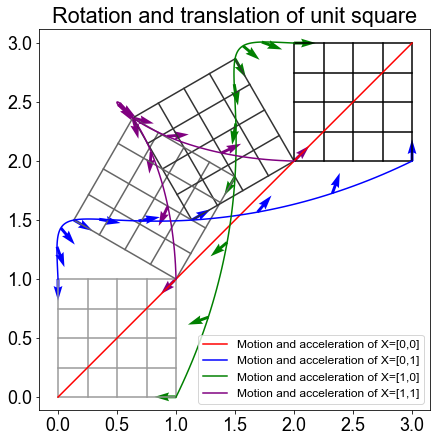

In [13]:
fig = plt.figure(figsize=(7,7))
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color=[0.6,0.6,0.6])
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=1
    xvec_1 = Phi_example_1(Xvec,1)
    plt.plot(xvec_1[0],xvec_1[1],color=[0.4,0.4,0.4])
    # deformed grid lines obtained from applying deformation map at t=2
    xvec_2 = Phi_example_1(Xvec,2)
    plt.plot(xvec_2[0],xvec_2[1],color=[0.2,0.2,0.2])
    # deformed grid lines obtained from applying deformation map at t=3
    xvec_3 = Phi_example_1(Xvec,3)
    plt.plot(xvec_3[0],xvec_3[1],color=[0.0,0.0,0.0])
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color=[0.6,0.6,0.6])
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=1
    xvec_1 = Phi_example_1(Xvec,1)
    plt.plot(xvec_1[0],xvec_1[1],color=[0.4,0.4,0.4])
    # deformed grid lines obtained from applying deformation map at t=2
    xvec_2 = Phi_example_1(Xvec,2)
    plt.plot(xvec_2[0],xvec_2[1],color=[0.2,0.2,0.2])
    # deformed grid lines obtained from applying deformation map at t=3
    xvec_3 = Phi_example_1(Xvec,3)
    plt.plot(xvec_3[0],xvec_3[1],color=[0.0,0.0,0.0])
    
# now lets just plot the trajectory of a couple of points for multiple times 
# this is one of the particles 
X0 = np.array([[0,0.,0]])
# this is another particle
X1 = np.array([[0.0,1.0,0]])
# this yet another particle 
X2 = np.array([[1.0,0.0,0]])
# last one 
X3 = np.array([[1.0,1.0,0]])
#
tvec = np.linspace(0,3,100)
x0 = np.zeros((100,3))
x1 = np.zeros((100,3))
x2 = np.zeros((100,3))
x3 = np.zeros((100,3))
for i in range(100):
    x0[i,:] = Phi_example_1(X0.transpose(),tvec[i])[:,0]
    x1[i,:] = Phi_example_1(X1.transpose(),tvec[i])[:,0]
    x2[i,:] = Phi_example_1(X2.transpose(),tvec[i])[:,0]
    x3[i,:] = Phi_example_1(X3.transpose(),tvec[i])[:,0]
plt.plot(x0[:,0],x0[:,1],color='red',label='Motion and acceleration of X=[0,0]')
plt.plot(x1[:,0],x1[:,1],color='blue',label='Motion and acceleration of X=[0,1]')
plt.plot(x2[:,0],x2[:,1],color='green',label='Motion and acceleration of X=[1,0]')
plt.plot(x3[:,0],x3[:,1],color='purple',label='Motion and acceleration of X=[1,1]')

# and let's plot the velocity for a few points along the trajectories of these particles 
t_quiver = np.linspace(1e-3,3,10)
x0_quiver = np.zeros((10,3))
A0 = np.zeros((10,3))
x1_quiver = np.zeros((10,3))
A1 = np.zeros((10,3))
x2_quiver = np.zeros((10,3))
A2 = np.zeros((10,3))
x3_quiver = np.zeros((10,3))
A3 = np.zeros((10,3))
for i in range(10):
    x0_quiver[i,:] = Phi_example_1(X0.transpose(),t_quiver[i])[:,0]
    A0[i,:] = A_example_1(X0.transpose(),t_quiver[i])[:,0]
    x1_quiver[i,:] = Phi_example_1(X1.transpose(),t_quiver[i])[:,0]
    A1[i,:] = A_example_1(X1.transpose(),t_quiver[i])[:,0]
    x2_quiver[i,:] = Phi_example_1(X2.transpose(),t_quiver[i])[:,0]
    A2[i,:] = A_example_1(X2.transpose(),t_quiver[i])[:,0]
    x3_quiver[i,:] = Phi_example_1(X3.transpose(),t_quiver[i])[:,0]
    A3[i,:] = A_example_1(X3.transpose(),t_quiver[i])[:,0]

#plt.quiver(x0_quiver[:,0],x0_quiver[:,1],A0[:,0],A0[:,1],color='red')
plt.quiver(x1_quiver[:,0],x1_quiver[:,1],A1[:,0],A1[:,1],color='blue')
plt.quiver(x2_quiver[:,0],x2_quiver[:,1],A2[:,0],A2[:,1],color='green')
plt.quiver(x3_quiver[:,0],x3_quiver[:,1],A3[:,0],A3[:,1],color='purple')
plt.axis('equal')
plt.title('Rotation and translation of unit square')
plt.legend(loc=4,fontsize =12)

While the velocity vectors are tangent to the trajectory, the acceleration vectors have two components, one component which is normal to the trajectory and points *inward* during a turn, plus a tangential acceleration component. We are plotting the total acceleration but even in that case we can see that these vectors do point *inward* around a bend, although not completely normal to the trajectory since there is some tangential component to the acceleration. Note that the point originally at $[0,0]$ has no acceleration because this point is just moving at a constant speed and the rotation is with respect to this point. Cool. 

Alright, let's just plot the entire velocity and acceleration vector fields 

(-0.1, 2.1, -0.14330127018922195, 3.0093266739736606)

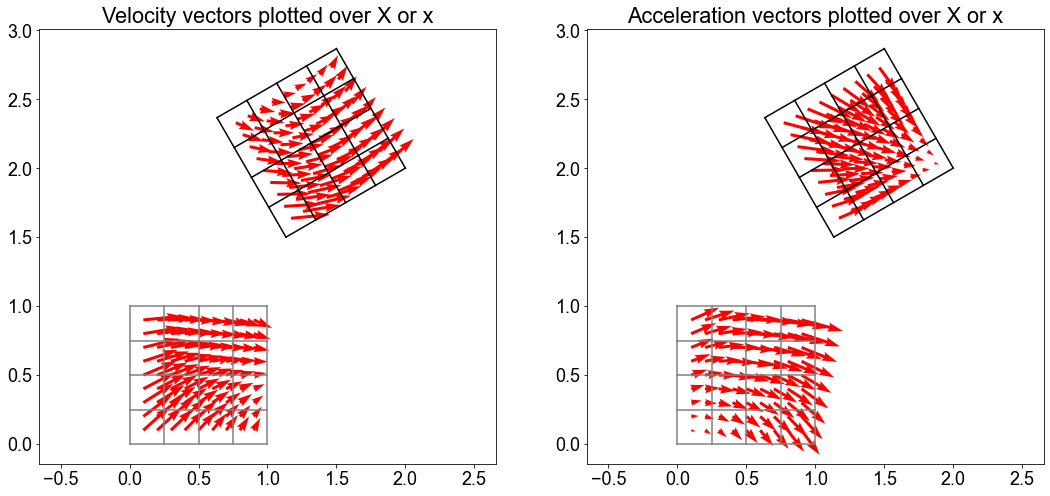

In [14]:
## just plotting the entire grid at two time points 
fig ,ax = plt.subplots(1,2,figsize=(18,8))
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    ax[0].plot(lineX1,X2i*np.ones(npx1),color=[0.5,0.5,0.5])
    ax[1].plot(lineX1,X2i*np.ones(npx1),color=[0.5,0.5,0.5])
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=2
    xvec = Phi_example_1(Xvec,2)
    ax[0].plot(xvec[0],xvec[1],color=[0.0,0.0,0.0])
    ax[1].plot(xvec[0],xvec[1],color=[0.0,0.0,0.0])
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    ax[0].plot(X1i*np.ones(npx2),lineX2,color=[0.5,0.5,0.5])
    ax[1].plot(X1i*np.ones(npx2),lineX2,color=[0.5,0.5,0.5])
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    # deformed grid lines obtained from applying deformation map at t=1
    # deformed grid lines obtained from applying deformation map at t=2
    xvec = Phi_example_1(Xvec,2)
    ax[0].plot(xvec[0],xvec[1],color=[0.0,0.0,0.0])
    ax[1].plot(xvec[0],xvec[1],color=[0.0,0.0,0.0])



# to create the quiver V(X,t) and v(x,t), loop over points in the reference, compute V, computer varphi
dx = 0.1
dy = 0.1
nx = int(1.0/dx)-1
ny = int(1.0/dy)-1
quivers_X = np.zeros((nx*ny,2))
quivers_V = np.zeros((nx*ny,2))
quivers_A = np.zeros((nx*ny,2))
quivers_x = np.zeros((nx*ny,2))
for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        X1 = (i+1)*dx
        X2 = (j+1)*dy
        # eval deformation to get deformed points 'x' at time t=1.1
        t = 2
        x = Phi_example_1(np.array([[X1,X2,0]]).transpose(),t)
        # store to plot later 
        quivers_X[i*nx+j,0] = X1
        quivers_X[i*nx+j,1] = X2
        quivers_x[i*nx+j,0] = x[0]
        quivers_x[i*nx+j,1] = x[1]
        # evaluate velocity and acceleration
        V = V_example_1(np.array([[X1,X2,0]]).transpose(),t)
        A = A_example_1(np.array([[X1,X2,0]]).transpose(),t)
        # note, we only have a way to evaluate V(X) and not v(x) 
        # store 
        quivers_V[i*nx+j,0] = V[0]
        quivers_V[i*nx+j,1] = V[1]
        quivers_A[i*nx+j,0] = A[0]
        quivers_A[i*nx+j,1] = A[1]
## PLOT 
# plot the field V over the points X 
ax[0].quiver(quivers_X[:,0],quivers_X[:,1],quivers_V[:,0],quivers_V[:,1],color='red')
# plot the SAME vectors, but over the points x
ax[0].quiver(quivers_x[:,0],quivers_x[:,1],quivers_V[:,0],quivers_V[:,1],color='red')
ax[0].set_title('Velocity vectors plotted over X or x')
# for acceleration
# plot the field A over the points X 
ax[1].quiver(quivers_X[:,0],quivers_X[:,1],quivers_A[:,0],quivers_A[:,1],color='red')
# plot the SAME vectors, but over the points x
ax[1].quiver(quivers_x[:,0],quivers_x[:,1],quivers_A[:,0],quivers_A[:,1],color='red')
ax[1].set_title('Acceleration vectors plotted over X or x')

ax[0].axis('equal')
ax[1].axis('equal')

Note that the vectors are the same, but the fields look completely different because of the motion

## Other vector fields and gradients with respect to X or x

Consider the motion $\mathbf{\varphi}$ given by 

$$
\begin{aligned}
x_1 &= (1+\alpha t) X_1\\
x_2 &=  X_2 +(X_2-0.5) X_1^2 t\\
x_3 &= X_3 \\
\end{aligned}
$$

* Plot the reference and deformed configurations for $t=0$ and $t=1$. Consider again the same unit cube. Consider $\alpha=0.5$ 

Now, let's consider we have some arbitrary vector field defined initially, in terms of coordinates $\mathbf{X}$

$$
\mathbf{W}(\mathbf{X}) = \begin{bmatrix} X_2\\ X_1\\0\end{bmatrix}
$$

IF the particles *carry* these vectors with them, then the vector field in the deformed coordinates will simply be to plot the vectors in the deformed positions $\mathbf{x}$. This defines the vector field $\mathbf{w}(\mathbf{x})$. This expression *carry with them* is nothing more than the relationship 

$$
\mathbf{w}(\mathbf{x}) = \mathbf{W}(\mathbf{\varphi}^{-1}(\mathbf{x}))
$$

* Plot the vector field $\mathbf{W}(\mathbf{X})$ over $\mathbf{X}$ and plot also $\mathbf{w}(\mathbf{x})$ without obtaining an analytical expression for it, all you need is to plot the vectors from the field $\mathbf{W}$ but paste them on the deformed coordinates $\mathbf{x}$

Now, assume we have some arbitrary scalar field defined over the reference coordinates

$$
\theta_0(\mathbf{X}) = X_1 X_2 
$$ 

Just as with the vector field $\mathbf{W}$, we can plot the scalar field over the deformed coordinates $\theta(\mathbf{x})$. Note that for scalar fields notation doesn't always change in references, sometimes the same variable $\theta$ would be used in both cases and the dependence of the coordinates is implied. The field $\theta(\mathbf{x})$ is defined by the same idea of *carrying over* the value of the field with the motion, and the relationship between the contours over $\mathbf{X}$ or $\mathbf{x}$ is again nothing more than 


$$
\theta(\mathbf{x}) = \theta_0(\mathbf{\varphi}^{-1}(\mathbf{x}))
$$

* Plot the contour $\theta_0$ and also $\theta$. Again, no need to compute $\theta$, just assign the values of $\theta_0$ to the corresponding deformed coordinates given by the motion $\mathbf{\varphi}$. 

Here comes the important distinction. We can generate a vector field out of this scalar field $\theta$ by the gradient operation. Since there is the scalar field in either the reference or deformed settings, there are two possible gradients. We can generate the gradient 

$$
\nabla_X \theta_0 = \frac{\partial \theta_0}{\partial \mathbf{X}}
$$

or 

$$
\nabla_x \theta = \frac{\partial \theta}{\partial \mathbf{x}}
$$

These vectors are not the same vectors. This is very important. For the vectors $\mathbf{W}$ and $\mathbf{w}$ above we had the same vectors, just plotted over $\mathbf{X}$ or $\mathbf{x}$, but the vectors generated by the gradients $\nabla_X \theta_0$ and $\nabla_x \theta$ are NOT the same vectors plotted over $\mathbf{X}$ or $\mathbf{x}$. Rather, for vector fields generated with the gradient operation, the correct relationship is 

$$
\nabla_x \theta = \mathbf{F}^{-T} \nabla_X \theta_0
$$

where $\mathbf{F}$ is the deformation gradient. 

* Plot the vector field $\nabla_X \theta_0$ on top of the contour $\theta_0$, verify that the contour is orthogonal to the contour 
* Plot the vector field $\nabla_x \theta$ without having an analytical expression for it, by using $\nabla_x \theta = \mathbf{F}^{-T} \nabla_X \theta_0$ and verify that this vector field is orthogonal to the contour $\theta$ 

#### Plot deformation 

First we are just plotting the deformation at $t=1$. 
Below you will see some code to setup all functions, including the deformation gradient, and then the code to plot.

In [15]:
# second example
def Phi_example_2(X,t):
    # defining the rotation tensor with the definition above 
    x = np.zeros(X.shape)
    x[0,:] = (1.+0.5*t)*X[0,:]
    x[1,:] = X[1,:]+ (X[1,:]-0.5)*X[0,:]**2*t
    x[2,:] = X[2,:]
    return x

# vector field W
def evalW(X):
    W = np.zeros(X.shape)
    W[0,:] = X[1,:]
    W[1,:] = X[0,:]
    return W

# scalar field theta
def evaltheta(X):
    return X[0,:]*X[1,:]

# eval deformation gradient 
def evalF(X,t):
    F = np.zeros((3,3))
    F[0,0] = (1.+0.5*t)
    F[0,1] = 0
    F[1,0] = 2*t*(X[1,:]-0.5)*X[0,:]
    F[1,1] = 1+X[0,:]**2*t
    F[2,2] = 1
    return F

# eval gradient of theta with respect to reference coords
def evalGradtheta(X):
    Gradtheta = np.zeros((X.shape))
    Gradtheta[0,:] = X[1,:]
    Gradtheta[1,:] = X[0,:]
    return Gradtheta 

(-0.07500000000000001, 1.575, -0.6, 1.6)

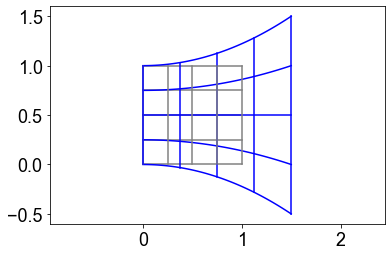

In [16]:
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    plt.plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    plt.plot(xvec[0],xvec[1],color='blue')
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    plt.plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    plt.plot(xvec[0],xvec[1],color='blue')
plt.axis('equal')

#### Plot the vector field

Below we just repeat the code but in two different subplots we plot the same vectors but either over $\mathbf{X}$ or over $\mathbf{x}$


(-0.6, 1.6)

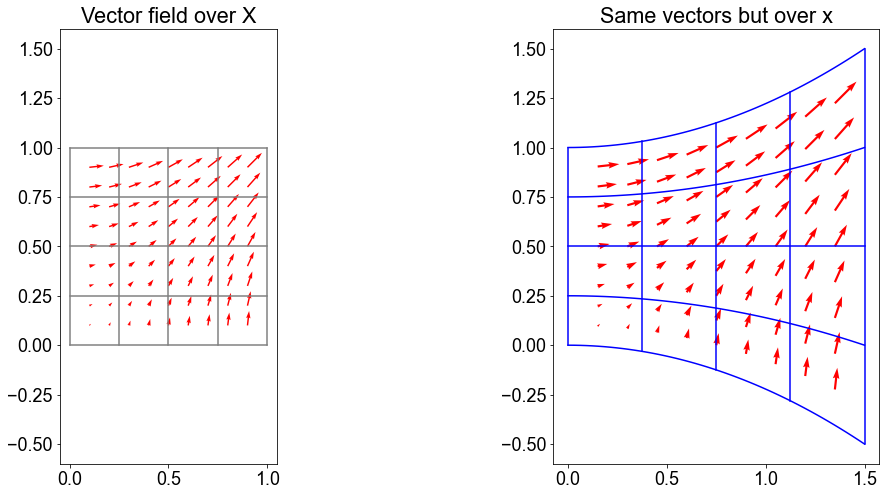

In [17]:
# plot the reference and deformed grids 
nlx1 = 5
nlx2 = 5
npx1 = 50
npx2 = 50
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

fig,axs = plt.subplots(1,2,figsize=(18,8))
# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    axs[0].plot(lineX1,X2i*np.ones(npx1),color='grey')
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='blue')
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    axs[0].plot(X1i*np.ones(npx2),lineX2,color='grey')
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='blue')
    
    
# to create the quiver V(X,t) and v(x,t), loop over points in the reference, compute V, computer varphi
dx = 0.1
dy = 0.1
nx = int(1.0/dx)-1
ny = int(1.0/dy)-1
quivers_X = np.zeros((nx*ny,2))
quivers_x = np.zeros((nx*ny,2))
quivers_W = np.zeros((nx*ny,2))

for i in range(nx):
    for j in range(ny):
        # points in reference configuration 'X'
        X1 = (i+1)*dx
        X2 = (j+1)*dy
        # eval deformation to get deformed points 'x' at time t=1.1
        t = 1
        x = Phi_example_2(np.array([[X1,X2,0]]).transpose(),t)
        # store to plot later 
        quivers_X[i*nx+j,0] = X1
        quivers_X[i*nx+j,1] = X2
        quivers_x[i*nx+j,0] = x[0]
        quivers_x[i*nx+j,1] = x[1]
        # evaluate velocity and acceleration
        W = evalW(np.array([[X1,X2,0]]).transpose())
        quivers_W[i*nx+j,0] = W[0]
        quivers_W[i*nx+j,1] = W[1]

## PLOT 
# plot the field V over the points X 
axs[0].quiver(quivers_X[:,0],quivers_X[:,1],quivers_W[:,0],quivers_W[:,1],color='red')
# plot the SAME vectors, but over the points x
axs[1].quiver(quivers_x[:,0],quivers_x[:,1],quivers_W[:,0],quivers_W[:,1],color='red')
axs[0].set_title('Vector field over X')
axs[1].set_title('Same vectors but over x')


axs[0].set_aspect('equal')
axs[0].set_ylim((-0.6,1.6))
axs[1].set_aspect('equal')
axs[1].set_ylim((-0.6,1.6))

#### Plot contour of scalar field over X or x

Similar to the vector field, we can plot the same scalar values, but either over the initial coordinates $\mathbf{X}$ or the deformed coordinates $\mathbf{x}$ 

In [18]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

(-0.6, 1.6)

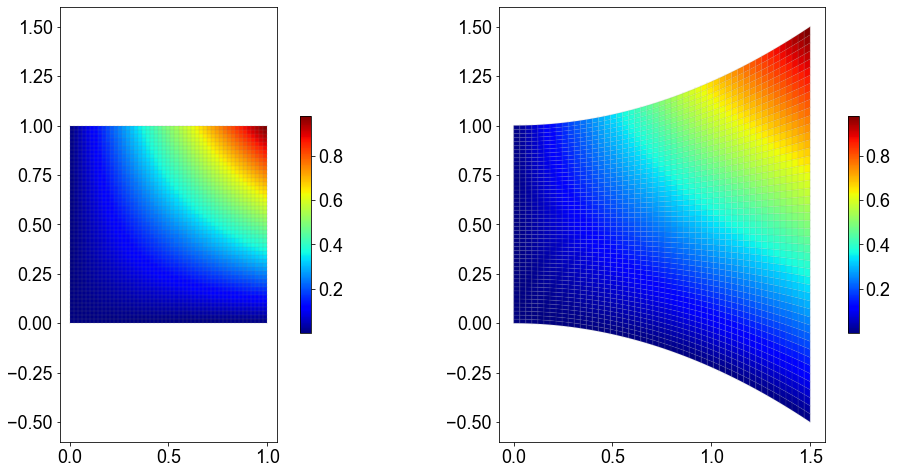

In [19]:
# plot the reference and deformed grids 
nlx1 = 50
nlx2 = 50
npx1 = 100
npx2 = 100
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

fig,axs = plt.subplots(1,2,figsize=(18,8))
# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    axs[0].plot(lineX1,X2i*np.ones(npx1),color='grey',alpha=0.1)
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='grey',alpha=0.1)
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    axs[0].plot(X1i*np.ones(npx2),lineX2,color='grey',alpha=0.1)
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='grey',alpha=0.1)
    
# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
dx1 = 0.5*1./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,1-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_2(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose(),1)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi_example_2(np.array([[Xquad[k,0],Xquad[k,1],0]]).transpose(),1)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        # color based on theta evaluation
        colorsX[i*X1mg.shape[1]+j] = evaltheta(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose())
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        # color the quad according to the same theta values
        colorsx[i*X1mg.shape[1]+j] = evaltheta(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose())
pX = PatchCollection(patchesX,cmap=matplotlib.cm.jet)
pX.set_array(colorsX)
axs[0].add_collection(pX)
px = PatchCollection(patchesx,cmap=matplotlib.cm.jet)
px.set_array(colorsx)
axs[1].add_collection(px)
plt.colorbar(px,ax=axs[0],shrink=0.5)
plt.colorbar(px,ax=axs[1],shrink=0.5)

axs[0].set_aspect('equal')
axs[0].set_ylim((-0.6,1.6))
axs[1].set_aspect('equal')
axs[1].set_ylim((-0.6,1.6))

You can see that both plots have the same values of the $\theta$, but in one case the values are plotted over the initial coordinates $\theta_0(\mathbf{X})$ while in the other case they are plotted over the deformed coordinates $\theta(\mathbf{x})$, but we didn't actually have to compute the analytical expression for $\theta(\mathbf{x})$, we simply evaluated $\theta(\mathbf{\varphi}^{-1}(\mathbf{X}))$. I know it doesn't like it, but by evaluating $\theta_0(\mathbf{X})$ and $\mathbf{x}=\mathbf{\varphi}(\mathbf{X})$ and plotting the values of $\theta_0$ over $\mathbf{x}$ we actually did exactly $\theta(\mathbf{\varphi}^{-1}(\mathbf{X}))$. 

#### Plot gradients over X or x

Lastly, we will plot the gradient 

$$
\nabla_X \theta_0
$$ 

directly, because we do have the $\theta_0(\mathbf{X})$ analytically. But we can't compute directly

$$
\nabla_x \theta
$$

instead we will do 

$$
\nabla_x \theta = \mathbf{F}^{-T}\nabla_X \theta_0
$$

It was stated before, but once again, even though for the scalar field we can just plot over $\mathbf{X}$ or $\mathbf{x}$, when we use the gradient to generate the vector field, we can't simply *copy-paste* vectors and plot them on $\mathbf{X}$ or $\mathbf{x}$. We need the deformation gradient (because of chain rule) 

(-0.6, 1.6)

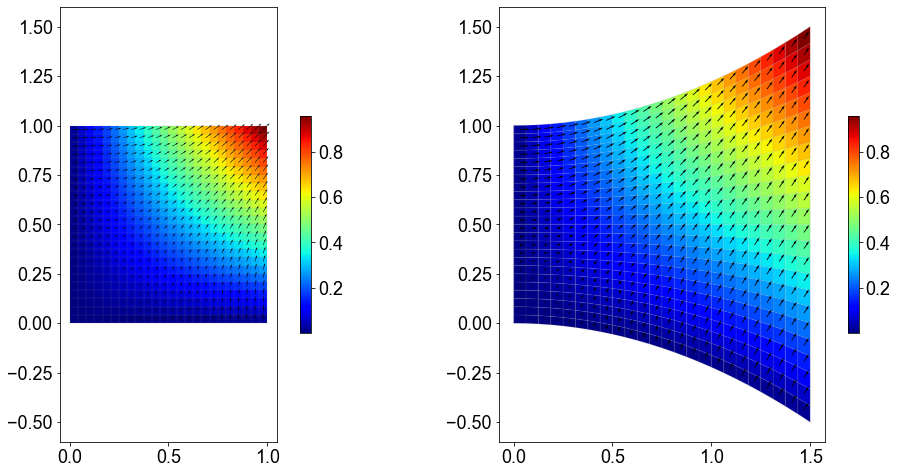

In [24]:

# plot the reference and deformed grids 
nlx1 = 25
nlx2 = 25
npx1 = 100
npx2 = 100
lineX1 = np.linspace(0,1,npx1)
lineX2 = np.linspace(0,1,npx2)

fig,axs = plt.subplots(1,2,figsize=(18,8))
# this for loop is to plot the grid lines which initially are horizontal 
for i in range(nlx1):
    # reference grid lines 
    X2i = i/(nlx1-1.0)*1.0 
    axs[0].plot(lineX1,X2i*np.ones(npx1),color='grey',alpha=0.1)
    # deformed grid lines obtained from applying deformation map 
    Xvec = np.stack([lineX1,X2i*np.ones(npx1),np.zeros((npx1))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='grey',alpha=0.1)
# this for loop is to plot the grid lines which initially are vertical 
for i in range(nlx2):
    X1i = i/(nlx2-1.0)*1.0 
    axs[0].plot(X1i*np.ones(npx2),lineX2,color='grey',alpha=0.1)
    Xvec = np.stack([X1i*np.ones(npx2),lineX2,np.zeros((npx2))],axis=0)
    xvec = Phi_example_2(Xvec,1)
    axs[1].plot(xvec[0],xvec[1],color='grey',alpha=0.1)
    
# Loop over grid points and create a quadrilateral for each grid point 
#viridis = matplotlib.cm.get_cmap('viridis', 50)
dx1 = 0.5*1./(nlx2-1)
dx2 = 0.5*1./(nlx1-1)
x1aux = np.linspace(dx1,1-dx1,nlx2-1)
x2aux = np.linspace(dx2,1-dx2,nlx1-1)
X1mg,X2mg = np.meshgrid(x1aux,x2aux)
x1mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
## for quiver plots 
Gradtheta0x_mg = np.zeros(X1mg.shape)
Gradtheta0y_mg = np.zeros(X1mg.shape)
gradthetax_mg = np.zeros(X1mg.shape)
gradthetay_mg = np.zeros(X1mg.shape)
x2mg = np.zeros(X1mg.shape)
patchesX = []
colorsX = np.zeros(((nlx1-1)*(nlx2-1)))
patchesx = []
colorsx = np.zeros(((nlx1-1)*(nlx2-1)))
for i in range(X1mg.shape[0]):
    for j in range(X1mg.shape[1]):
        # first obtain the corresponding deformed grid centers 
        xvecij = Phi_example_2(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose(),1)
        x1mg[i,j] = xvecij[0]
        x2mg[i,j] = xvecij[1]
        # but now we also want the quadrilateral around this grid point 
        quad_coord = np.array([[-1,-1],[1,-1],[1,1],[-1,1]])
        Xquad = np.zeros((4,2))
        xquad = np.zeros((4,2))
        for k in range(4):
            Xquad[k,0] = X1mg[i,j] +quad_coord[k,0]*dx1
            Xquad[k,1] = X2mg[i,j] +quad_coord[k,1]*dx2
            aux = Phi_example_2(np.array([[Xquad[k,0],Xquad[k,1],0]]).transpose(),1)
            xquad[k,0] = aux[0]
            xquad[k,1] = aux[1]
        polygon = Polygon(Xquad, closed=True)
        patchesX.append(polygon)
        # color based on theta evaluation
        colorsX[i*X1mg.shape[1]+j] = evaltheta(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose())
        polygon = Polygon(xquad, closed=True)
        patchesx.append(polygon)
        # color the quad according to the same theta values
        colorsx[i*X1mg.shape[1]+j] = evaltheta(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose())
        ##
        ## GRADIENTS ## 
        ## 
        # ok, first deformation gradient 
        F = evalF(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose(),1)
        # then reference gradient 
        Gradtheta0 = evalGradtheta(np.array([[X1mg[i,j],X2mg[i,j],0]]).transpose())
        Gradtheta0x_mg[i,j] = Gradtheta0[0]
        Gradtheta0y_mg[i,j] = Gradtheta0[1]
        # the deformed gradient 
        gradtheta = np.dot(np.linalg.inv(F).transpose(),Gradtheta0)
        gradthetax_mg[i,j] = gradtheta[0]
        gradthetay_mg[i,j] = gradtheta[1]
        
pX = PatchCollection(patchesX,cmap=matplotlib.cm.jet)
pX.set_array(colorsX)
axs[0].add_collection(pX)
px = PatchCollection(patchesx,cmap=matplotlib.cm.jet)
px.set_array(colorsx)
axs[1].add_collection(px)
plt.colorbar(px,ax=axs[0],shrink=0.5)
plt.colorbar(px,ax=axs[1],shrink=0.5)

### plot the gradient quivers 
axs[0].quiver(X1mg,X2mg,Gradtheta0x_mg,Gradtheta0y_mg,color='black')
axs[1].quiver(x1mg,x2mg,gradthetax_mg,gradthetay_mg,color='black')

axs[0].set_aspect('equal')
axs[0].set_ylim((-0.6,1.6))
axs[1].set_aspect('equal')
axs[1].set_ylim((-0.6,1.6))



Does it make sense? 
Well, to see if it makes sense, let's think about the gradient operation. The gradient should give us vectors normal to the contour. In the reference configuration we can see that the vectors are indeed normal to the contours. In the deformed configuration, the vectors are also orthogonal to the contours, so they make sense. 